In [1]:
import numpy as np
import pandas as pd
from scipy.constants import h,k,c,Wien,sigma
from astroquery.vizier import Vizier

%matplotlib inline
import matplotlib.pyplot as plt

# change plotting defaults
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (14, 10)

In [2]:
#integral from a to b points
def rect_rule_data_defintgral(x, f, a, b): #for definite integral from (a,b) 
    #check bounday limits, make an if statement to check endpoints
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x[i+1] - x[i] #for ever index there is a delta x in value
        sum = sum + f[i]*delta_x
    return sum

In [3]:
#integral from a to b points
def rect_rule_data_defintgral_photons(x, f, a, b, h, c): #for definite integral from (a,b) 
    # photon energy of E = hc/lambda
    #NOTE your input for x is in micron and f is per micron. Convert to meters
    e = (h*c)/(x*1e-6) #x converting microns to meters, e is photon energy 
    #check bounday limits, make an if statement to check endpoints
    #when finding the index, the units have to be the same with the x array units
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    #converted to photons
    y = (f/1e-6)/e #converting per micron to per meter then divide by photon energy
    x_m = (x*1e-6) #converting micron to meter
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x_m[i+1] - x_m[i] #for ever index there is a delta x in value
        sum = sum + y[i]*delta_x
    return sum

In [4]:
def trap_rule_data_defintgral(x, f, a, b): #for definite integral from (a,b) in trapezoidal rule
    #check bounday limits, make an if statement to check endpoints
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x[i+1] - x[i] #for ever index there is a delta x in value
        sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

In [5]:
#integral from a to b points in Trapezoid Rule for photons
def trap_rule_data_defintgral_photons(x, f, a, b, h, c): #for definite integral from (a,b) 
    # photon energy of E = hc/lambda
    #NOTE your input for x is in micron and f is per micron. Convert to meters
    e = (h*c)/(x*1e-6) #x converting microns to meters, e is photon energy 
    #check bounday limits, make an if statement to check endpoints
    #when finding the index, the units have to be the same with the x array units
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    #converted to photons
    y = (f/1e-6)/e #converting per micron to per meter then divide by photon energy
    x_m = (x*1e-6) #converting micron to meter
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x_m[i+1] - x_m[i] #for ever index there is a delta x in value
        sum = sum + ((y[i+1] + y[i])/2)*(delta_x) #sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

For the data on TRAPPIST-1, you need steller spectra data of the TOA for TRAPPIST-1 or at least a star similar in the same spectral class M9V (check Gillion paper). Look for data to download and repeat the intregal code for the full wavelength and PAR range in energy and photons. 

Data used is a model of the TRAPPIST-1 spectrum where the flux is given at 1 AU. (Lincowski et al., 2018) http://vpl.astro.washington.edu/spectra/stellar/trappist1.htm

The visible-NIR portion is a standard 2500K M dwarf from the PHOENIX 2.0 spectral library
(http://phoenix.astro.physik.uni-goettingen.de/)
with UV < 0.3112 um from the Meadows et al. 2018 Proxima Centauri spectrum
with UV scaled such that Lyman alpha is 1/6 of Proxima, according to Bourrier et al 2017. It includes a 3000 K fit blackbody extension from 5.5 to 200 microns
The bolometric flux has been scaled to the luminosity of TRAPPIST-1 (0.000525 L_sun)

In [6]:
cols2=['blank','wavelength', 'flux']
#TRAP_data = np.genfromtxt('trappist1_sed.txt', delimiter='	') 
TRAP_data1 = pd.read_csv('trappist1_sed_original.txt', sep ='	', header=19, names=cols2)
TRAP_data1 #wavelength in um and flux at 1 AU is W/m2/um

,blank,wavelength,flux
0,NaN,0.120011,6.162980e-04
1,NaN,0.120012,6.576850e-04
2,NaN,0.120013,7.303310e-04
3,NaN,0.120015,6.130150e-04
4,NaN,0.120016,3.218180e-04
...,...,...,...
83272,NaN,185.185000,1.712030e-08
83273,NaN,188.679000,1.589080e-08
83274,NaN,192.308000,1.472850e-08
83275,NaN,196.078000,1.363110e-08


In [7]:
TRAP_data1['wavelength'][83276]

200.0

Text(0.5, 1.0, 'Representive TRAPPIST-1 Spectrum')

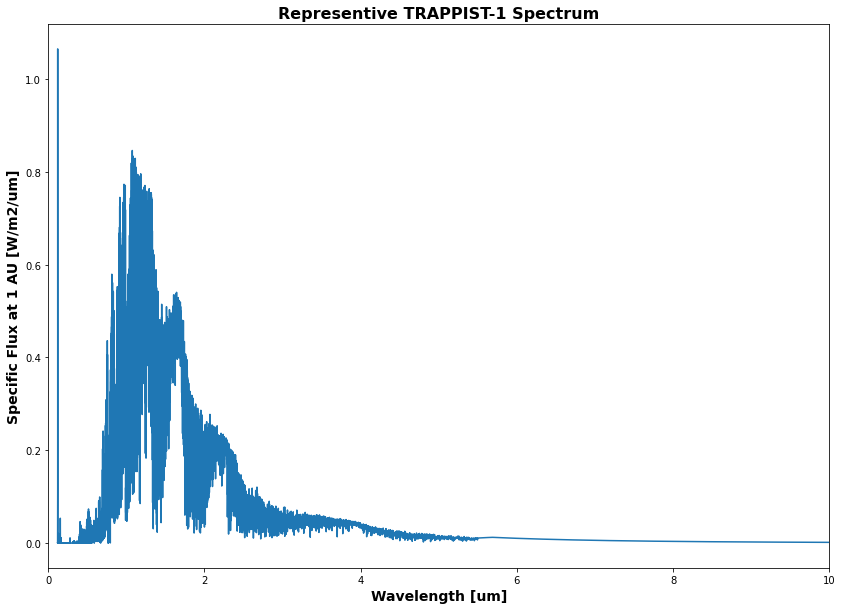

In [8]:
plt.plot(TRAP_data1['wavelength'], TRAP_data1['flux'])
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux at 1 AU [W/m2/um]')
plt.xlim(0, 10)
plt.title('Representive TRAPPIST-1 Spectrum')

From Lincowski et al. 2018, the input stellar spectral energy distribution for TRAPPIST-1, an M8V star (Liebert & Gizis 2006), using the PHOENIX v2.0 spectral database (France et al. 2013), is normalized to 1 $S_{Earth}$. 

In [9]:
def blackbody_wav(w, T): #w is lambda in meters, T is temperature in Kelvin, these are the inputs
    s = (h*c)/(w*k*T) # define section of equation, e^(...)
    x = (2*h*(c**2))/(w**5) #front portion of equation 
    y = x/(np.exp(s) - 1)#b is B_lambda
    b = y*np.pi #converting intensity to flux, acknowledging steradians
    return np.array([w,b]) #output of array  of (wavelength, B_lambda) as W/m^2 per unit wavelength (meter)

(0.1, 10.0)

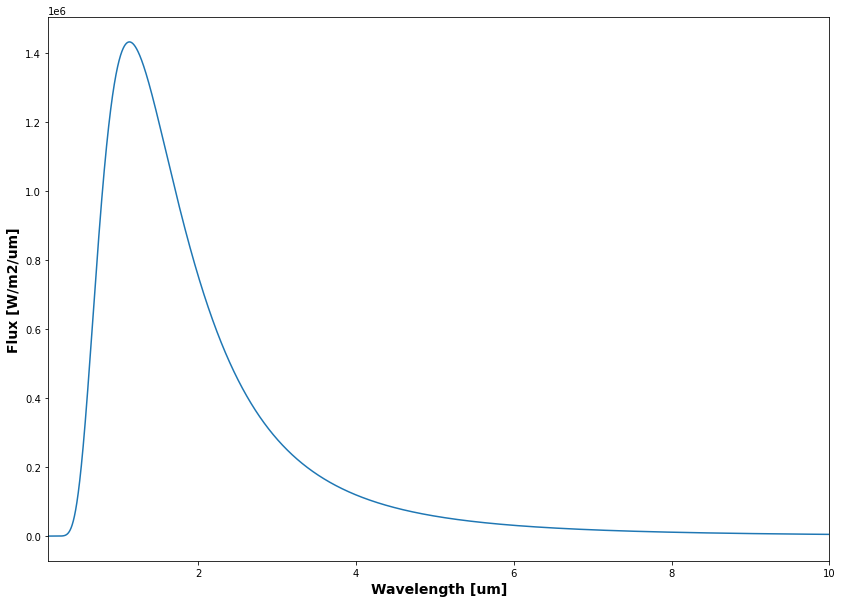

In [10]:
wave = np.arange(0.01e-6, 3e-4, 1e-11) 
flux = blackbody_wav(wave, 2566)

plt.plot(flux[0]/1e-6, flux[1]*1e-6)
plt.xlabel('Wavelength [um]')
plt.ylabel('Flux [W/m2/um]')
plt.xlim(0.1, 10)
#note this is from the surface of the star and is the blackbody surface of the star

In [11]:
(flux[1]*1e-6).max()

1431392.0002273524

In [12]:
np.argmax(flux[1]*1e-6)

111930

In [13]:
(flux[0][111930])*1e6

1.1292999999999729

In [14]:
au = 149597870700 #m
R_sol = 6.957e8
R_TRAP1 = 0.1192*R_sol
L_TRAP1e_Gill = 4*np.pi*((R_TRAP1)**2)*(flux[1])
TRAP1_e_insol_Gill_spectra = (L_TRAP1e_Gill)/(4*np.pi*((0.02817*au)**2))
TRAP1_e_insol_Gill_spectra #W/m^2 per wavelength (m)

array([4.45280463e-223, 7.75768962e-223, 1.35004349e-222, ...,
       3.16055097e+000, 3.16055055e+000, 3.16055013e+000])

(0.1, 10.0)

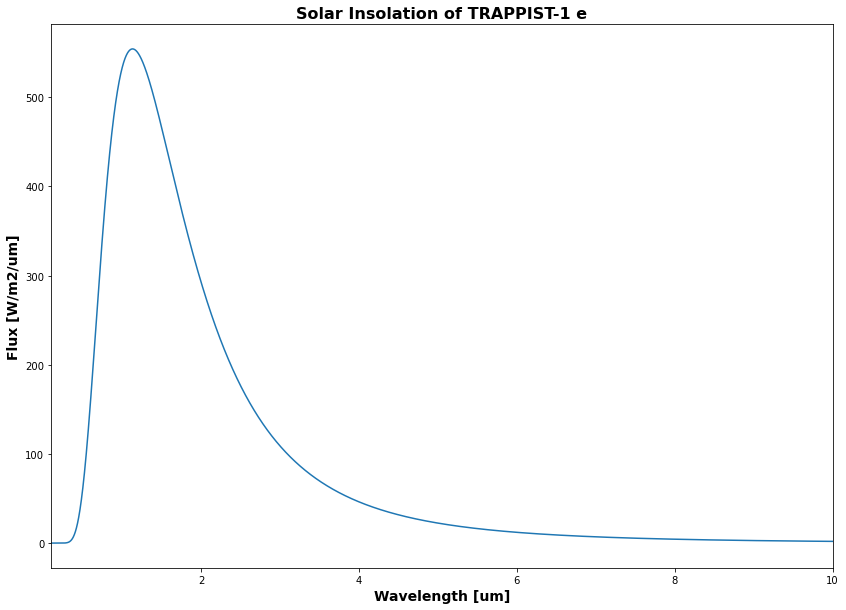

In [15]:
plt.plot(flux[0]/1e-6, TRAP1_e_insol_Gill_spectra*1e-6)
plt.xlabel('Wavelength [um]')
plt.ylabel('Flux [W/m2/um]')
plt.title('Solar Insolation of TRAPPIST-1 e')
plt.xlim(0.1, 10)

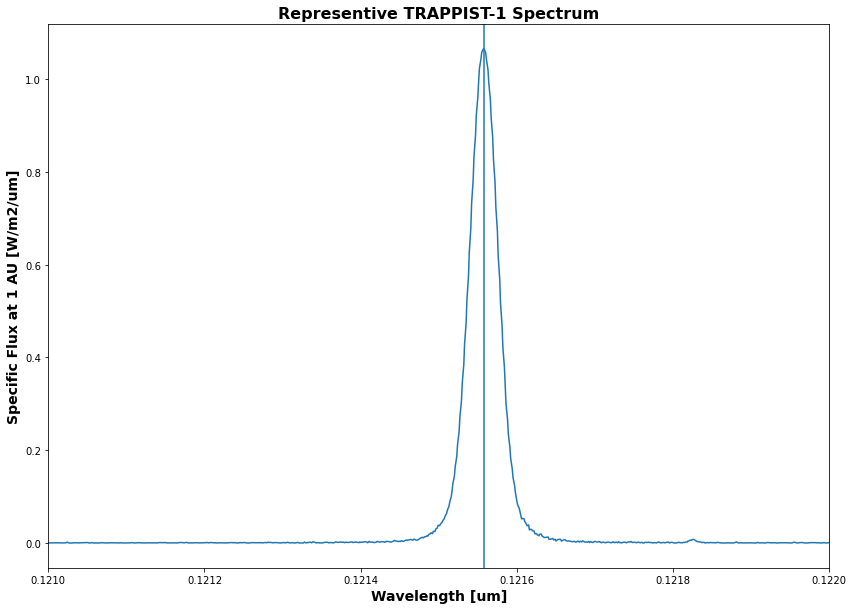

In [16]:
plt.plot(TRAP_data1['wavelength'], TRAP_data1['flux'])
plt.title('Representive TRAPPIST-1 Spectrum')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux at 1 AU [W/m2/um]')
plt.xlim(0.121, 0.122)
plt.axvline(0.121558); #

There is a very strong emission line at 0.121558 microns. This is 1215.58 Angstroms and the Lynmann Alpha line. This is where hydrogen goes from level 2 (first excited state) to level 1 (ground state). When you decrease a level, you are emitting.

Considering how large the Lymann Alpha is compared to the main light emission in the infrared of TRAPPIST-1, this is a sign that the star is emitting high amounts of ultraviolet light in that line. All the UV light is concentrated and focused in the area of the line, the rest are flat in the UV region. This could be hazarderous to atmosphere.

Chromosphere is optically thin above the photosphere that produces emission lines, which seems indicate the highest flux is in the chromosphere lymann alpha line. (photosphere -> chromosphere -> corona)


Considering that TRAPPIST-1 model spectrum has a flux at 1 AU, the flux for the stellar insolation needs to be adjusted to the distance that TRAPPIST- e is at. Since $S_{d} \propto \frac{1}{r^{2}}$, then we take the original flux / $d^{2}$ in AU units.

From Agol et. 2021, the distance of TRAPPIST-1 e is 2.925e-2 \pm 0.025 AU. Whereas Gillon et al. (2017) states the semimajor axis is 0.02817 AU.

Since Linckowski et. al. published this in 2018, it would stand to reason it would more likely relate to the data from Gillon et al. (2017) (consider that data was used as the input). First round will see how the integral code results matched bas on TRAPPIST-1 e at 0.02817 AU. Then second round will see how it matches with the data from the Time Transit Varinging results of Agol et. al. 2021 of 0.02925 AU.

**Gillion et. al. (2017) distance**

In [17]:
flux_TRAP1e = (TRAP_data1['flux'])/((0.02817)**2)
flux_TRAP1e

0        0.776635
1        0.828790
2        0.920335
3        0.772498
4        0.405543
           ...   
83272    0.000022
83273    0.000020
83274    0.000019
83275    0.000017
83276    0.000016
Name: flux, Length: 83277, dtype: float64

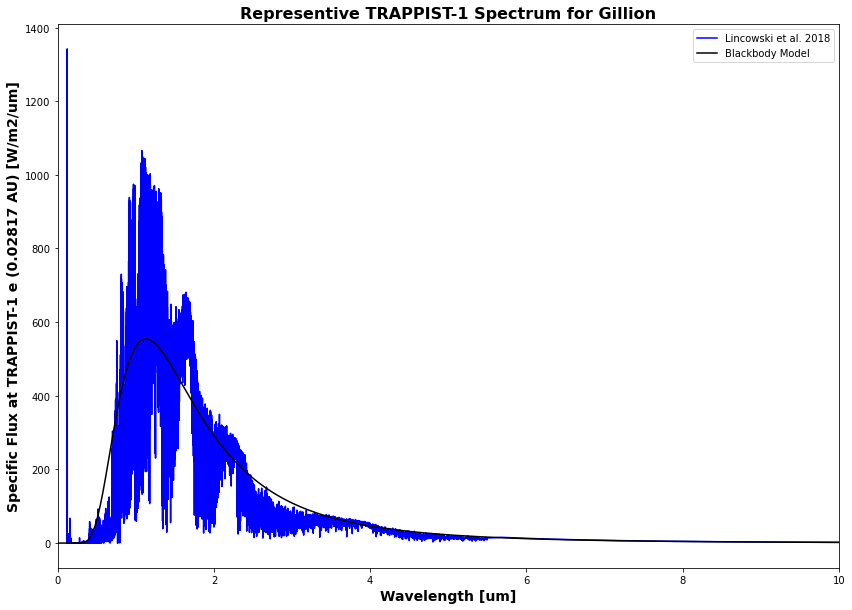

In [18]:

plt.plot(TRAP_data1['wavelength'],flux_TRAP1e, color='blue', label='Lincowski et al. 2018')
plt.plot(flux[0]/1e-6, TRAP1_e_insol_Gill_spectra*1e-6, color='black', label='Blackbody Model')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux at TRAPPIST-1 e (0.02817 AU) [W/m2/um]')
plt.xlim(0, 10)
plt.title('Representive TRAPPIST-1 Spectrum for Gillion')
plt.legend();

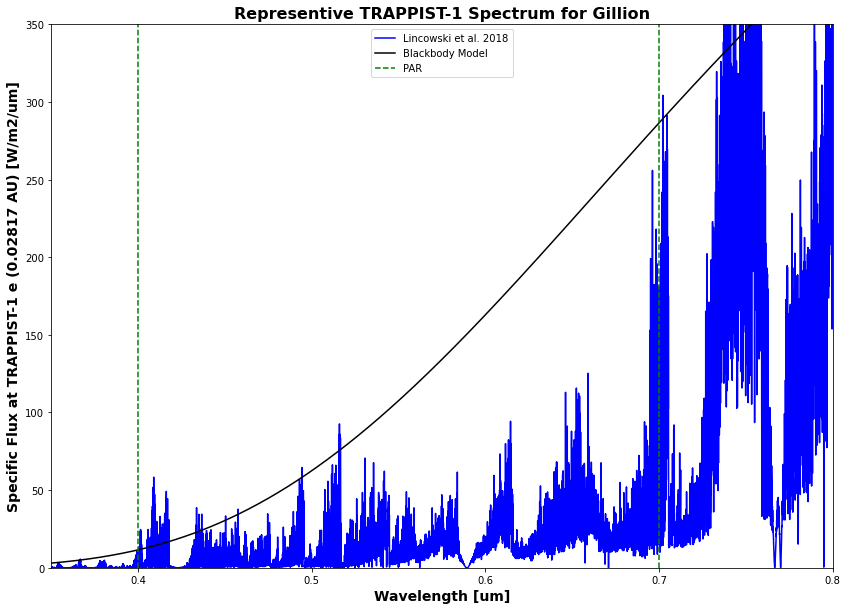

In [19]:
plt.plot(TRAP_data1['wavelength'],flux_TRAP1e, color='blue', label='Lincowski et al. 2018')
plt.plot(flux[0]/1e-6, TRAP1_e_insol_Gill_spectra*1e-6, color='black', label='Blackbody Model')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux at TRAPPIST-1 e (0.02817 AU) [W/m2/um]')
plt.xlim(0.35, 0.8)
plt.ylim(0,350)
plt.axvline(0.4, c='green', ls='--', label='PAR')
plt.axvline(0.7, c='green', ls='--')
plt.title('Representive TRAPPIST-1 Spectrum for Gillion')
plt.legend();

In [20]:
flux_TRAP1e.max()

1341.8832790266613

In [21]:
#TRAPPIST-1 e in full wavelength, rectangle rule
g = []
g = TRAP_data1['wavelength']
f = []
f = flux_TRAP1e
i, j = TRAP_data1['wavelength'][0], TRAP_data1['wavelength'][83276]
rect_rule_data_defintgral(g, f, i, j)

900.6972694621119

NOTE: According to Agol et. al. 2021, the stellar insolation of TRAPPIST-1 e is 0.646 $S_{\odot}$. While for Gillion et al 2017, it's 0.6603 $S_{\odot}$

In the blackbody function, the insolation for TRAPPIST-1 e comes out as 882.8364 W/m^2 or 0.64867 $S_{\odot}$. 

In [22]:
0.6603*1361

898.6683

In [23]:
s = rect_rule_data_defintgral(g, f, i, j)
s/1361

0.6617907931389507

In [24]:
rat = s/1361
np.absolute(s - (0.6603*1361))/(0.6603*1361)*100

0.22577512326982396

In [25]:
#PAR range
d, e = 0.4, 0.7 #microns
rect_rule_data_defintgral(g, f, d, e) #W/m^2

4.719452260277223

In [26]:
#fraction of PAR from the total
s_PAR = rect_rule_data_defintgral(g, f, d, e)
s_PAR/s

0.005239776360258799

In [27]:
33.95714109711257/s_PAR

7.1951445261823475

In the PAR range from the blackbody function, the stellar insolation was 33.957 W/m^2 and gets only about 4% of the energy from it's star. Yet here the results are  4.719 W/m^2 and is only 0.524% of the output of the star. Look at file 'trappist1_solarinsolation_energy'

What this shows is how inaccurate the blackbody function is compared to an M-star as shown up. The Lincowski model shows the TRAPPIST-1 model at TRAP-1 e distance is 7.195 times smaller in the PAR range that the blackbody function appears to be overestimated. 

In [28]:
#Trapezoid Rule
trap_rule_data_defintgral(g, f, i, j)

900.5097330982705

In [29]:
l = trap_rule_data_defintgral(g, f, i, j)
np.absolute(l - (0.6603*1361))/(0.6603*1361)*100

0.20490687145307113

In [30]:
l/1361

0.6616530000722046

In [31]:
#Trap rule for energy in par
trap_rule_data_defintgral(g, f, d, e)

4.720710883097851

In [32]:
l_PAR = trap_rule_data_defintgral(g, f, d, e)
l_PAR/l

0.005242265252209874

Results from Trapezoid Rule in energy are 4.721 W/m^2 and is only 0.524% of the output of the star.

In photons.

In [33]:
#Rectangle Rule in photons
rect_rule_data_defintgral_photons(g, f, i, j, h, c)

9.246306442712123e+21

In [34]:
s_photon = rect_rule_data_defintgral_photons(g, f, i, j, h, c)
np.absolute(s_photon - (9.225440065222435e+21))/(9.225440065222435e+21)*100 
#compared to full wavelength of blackbody function in photons

0.22618300419455303

From the blackbody function, the full solar photon flux for TRAPPIST-1 e is approximately 9.225 x $10^{21}$ photons $m^{-2} s^{-1}$ while the PAR range is 1.040 x $10^{20}$ photons $m^{-2} s^{-1}$ Look at file 'TRAP1_insol_photons_total&PAR_figures'

In [35]:
#PAR range
rect_rule_data_defintgral_photons(g, f, d, e, h, c)

1.426544593092853e+19

In [36]:
s_photon_PAR = rect_rule_data_defintgral_photons(g, f, d, e, h, c)
np.absolute(s_photon_PAR - (1.040342063775682e+20))/(1.040342063775682e+20)*100
#compared to blackbody function in photons in PAR range

86.28773513285103

In [37]:
s_photon_PAR/s_photon

0.00154282642688881

In [38]:
1.040342063775682e+20/s_photon_PAR #amount in PAR range from blackbody model

7.292741277159408

In [39]:
#Trapezoid rule in photons
trap_rule_data_defintgral_photons(g, f, i, j, h, c)

9.242853803613324e+21

In [40]:
l_photon = trap_rule_data_defintgral_photons(g, f, i, j, h, c)
np.absolute(l_photon - (9.225440065222435e+21))/(9.225440065222435e+21)*100 

0.18875780740838602

In [41]:
#PAR range
trap_rule_data_defintgral_photons(g, f, d, e, h, c)

1.42697320063445e+19

In [42]:
l_photon_PAR = trap_rule_data_defintgral_photons(g, f, d, e, h, c)
np.absolute(l_photon_PAR - (1.040342063775682e+20))/(1.040342063775682e+20)*100
#compared to blackbody function in photons in PAR range

86.283615261546

In [43]:
l_photon_PAR/l_photon

0.0015438664626249968

In [44]:
1.040342063775682e+20/l_photon_PAR #amount in PAR range from blackbody model

7.290550819827121

In the PAR range in photons, the area of the amount of photons from the blackbody curve is 7.29 times higher than the model spectra (based on the distance from Gillion et. al. 2017).

**Agol et. al. 2021**

In [45]:
flux_TRAP1e1 = (TRAP_data1['flux'])/((0.02925)**2)
flux_TRAP1e1

0        0.720342
1        0.768716
2        0.853627
3        0.716505
4        0.376148
           ...   
83272    0.000020
83273    0.000019
83274    0.000017
83275    0.000016
83276    0.000015
Name: flux, Length: 83277, dtype: float64

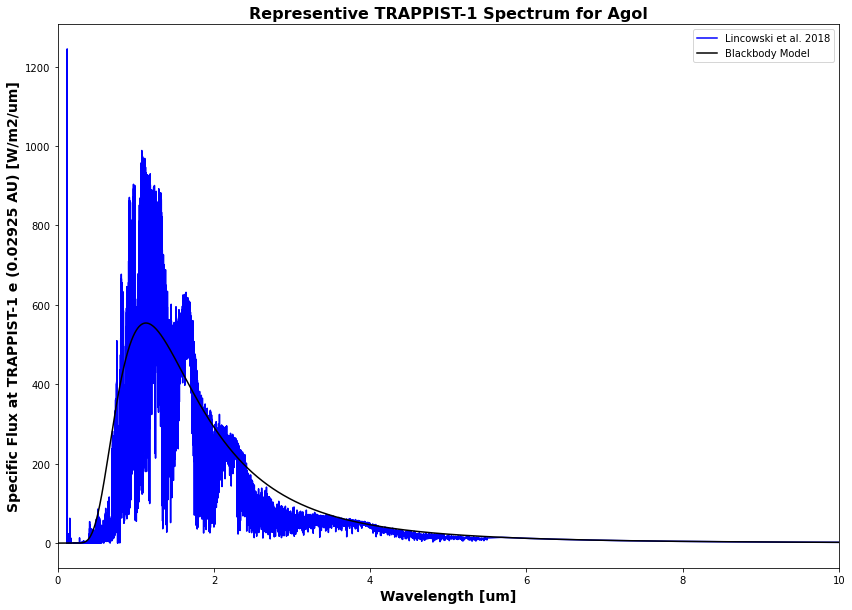

In [46]:
plt.plot(TRAP_data1['wavelength'],flux_TRAP1e1, color='blue', label='Lincowski et al. 2018')
plt.plot(flux[0]/1e-6, TRAP1_e_insol_Gill_spectra*1e-6, color='black', label='Blackbody Model')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux at TRAPPIST-1 e (0.02925 AU) [W/m2/um]')
plt.xlim(0, 10)
plt.title('Representive TRAPPIST-1 Spectrum for Agol')
plt.legend();

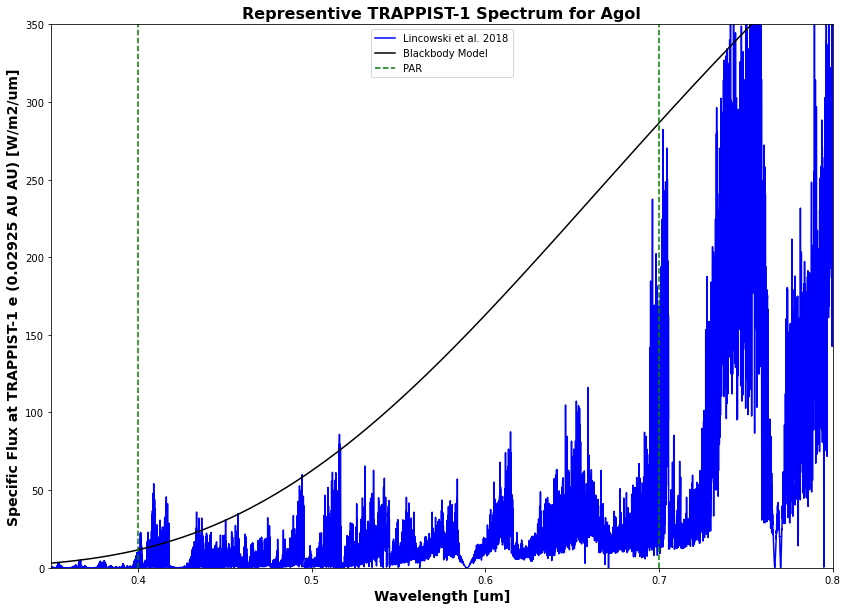

In [47]:
plt.plot(TRAP_data1['wavelength'],flux_TRAP1e1, color='blue', label='Lincowski et al. 2018')
plt.plot(flux[0]/1e-6, TRAP1_e_insol_Gill_spectra*1e-6, color='black', label='Blackbody Model')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux at TRAPPIST-1 e (0.02925 AU AU) [W/m2/um]')
plt.xlim(0.35, 0.8)
plt.ylim(0,350)
plt.axvline(0.4, c='green', ls='--', label='PAR')
plt.axvline(0.7, c='green', ls='--')
plt.title('Representive TRAPPIST-1 Spectrum for Agol')
plt.legend();

In [48]:
flux_TRAP1e1.max()

1244.6197676966908

In [49]:
#TRAPPIST-1 e in full wavelength, rectangle rule
g = []
g = TRAP_data1['wavelength']
y = []
y = flux_TRAP1e1
i, j = TRAP_data1['wavelength'][0], TRAP_data1['wavelength'][83276]
rect_rule_data_defintgral(g, y, i, j)

835.4121731780674

In [50]:
0.646*1361

879.206

In [51]:
a = rect_rule_data_defintgral(g, y, i, j)
a/1361

0.6138223168097483

In [52]:
np.absolute(a - (0.646*1361))/(0.646*1361)*100

4.981065509326894

In [53]:
#PAR range
rect_rule_data_defintgral(g, y, d, e) #W/m^2

4.377372956090865

In [54]:
a_PAR = rect_rule_data_defintgral(g, y, d, e)
a_PAR/a

0.0052397763602587966

In [55]:
#Trapezoid Rule
trap_rule_data_defintgral(g, y, i, j)

835.2382299825273

In [56]:
b = trap_rule_data_defintgral(g, y, i, j)
np.absolute(b - (0.646*1361))/(0.646*1361)*100

5.000849632221883

In [57]:
b/1361

0.6136945113758466

In [58]:
#Trap rule for energy in par
trap_rule_data_defintgral(g, y, d, e)

4.378540350354687

In [59]:
b_PAR = trap_rule_data_defintgral(g, y, d, e)
b_PAR/b

0.005242265252209879

For comparing to the Agol et. al. (2021) distance and insolation, from rectangle rule the results are in total 835.4 W/m^2 (0.614 $S_{Earth}$) whereas the PAR region is 4.377 W/m^2 and is only 0.524% of the output of the star. From Trapezoid rule the results are in total 835.24 W/m^2 (0.614 $S_{Earth}$ whereas the PAR region is 4.378 W/m^2 and is only 0.524% of the output of the star.

In photons

In [60]:
#Rectangle Rule in photons
rect_rule_data_defintgral_photons(g, y, i, j, h, c)

8.576107890045566e+21

In [61]:
a_photon = rect_rule_data_defintgral_photons(g, y, i, j, h, c)
np.absolute(a_photon - (9.225440065222435e+21))/(9.225440065222435e+21)*100 
#compared to full wavelength of blackbody function in photons

7.038495406031485

In [62]:
#PAR range
rect_rule_data_defintgral_photons(g, y, d, e, h, c)

1.3231445892611994e+19

In [63]:
a_photon_PAR = rect_rule_data_defintgral_photons(g, y, d, e, h, c)
np.absolute(a_photon_PAR - (1.040342063775682e+20))/(1.040342063775682e+20)*100
#compared to blackbody function in photons in PAR range

87.28163903649968

In [64]:
a_photon_PAR/a_photon

0.0015428264268888172

In [65]:
#Trapezoid rule in photons
trap_rule_data_defintgral_photons(g, y, i, j, h, c)

8.57290550803499e+21

In [66]:
b_photon = trap_rule_data_defintgral_photons(g, y, i, j, h, c)
np.absolute(b_photon - (9.225440065222435e+21))/(9.225440065222435e+21)*100 

7.073207918257849

In [67]:
#PAR range
trap_rule_data_defintgral_photons(g, y, d, e, h, c)

1.3235421301108281e+19

In [68]:
b_photon_PAR = trap_rule_data_defintgral_photons(g, y, d, e, h, c)
np.absolute(b_photon_PAR - (1.040342063775682e+20))/(1.040342063775682e+20)*100
#compared to blackbody function in photons in PAR range

87.27781778516831

In [69]:
b_photon_PAR/b_photon

0.0015438664626249911

In [70]:
9.225440065222435e+21/b_photon

1.076115916193857

In [71]:
1.040342063775682e+20/b_photon_PAR

7.860286726865037

*In the PAR range in photons*, the area of the amount of photons from the blackbody curve is **7.86 times higher** than the model spectra (based on the distance from Agol et. al. 2021).

### Comparison to Earth and TRAPPIST-1 e

Compare the amount of the photons that Sol-Earth spectra has to TRAPPIST-1 spectra in the PAR range

In [72]:
cols=['Wavelength', 'Wavenumber', 'Solar Flux incident at top of atmosphere', 'Planetary Flux', 'Albedo']
sol_data = pd.read_csv('earth_quadrature_radiance_refl.flx', sep ='	', header=7, names=cols)
sol_data

,Wavelength,Wavenumber,Solar Flux incident at top of atmosphere,Planetary Flux,Albedo
0,0.100180,99820.320,0.807223,0.000000,0.000000
1,0.100181,99819.330,0.807203,0.000000,0.000000
2,0.100182,99818.330,0.807183,0.000000,0.000000
3,0.100183,99817.330,0.807163,0.000000,0.000000
4,0.100184,99816.340,0.807143,0.000000,0.000000
...,...,...,...,...,...
97816,4.990020,2004.000,3.575930,3.115866,0.871344
97817,4.992510,2003.000,3.573370,3.124458,0.874373
97818,4.995010,2001.998,3.594160,3.155102,0.877841
97819,4.997500,2001.001,3.589550,3.169270,0.882916


NOTE: We are using the Gillion distance. 

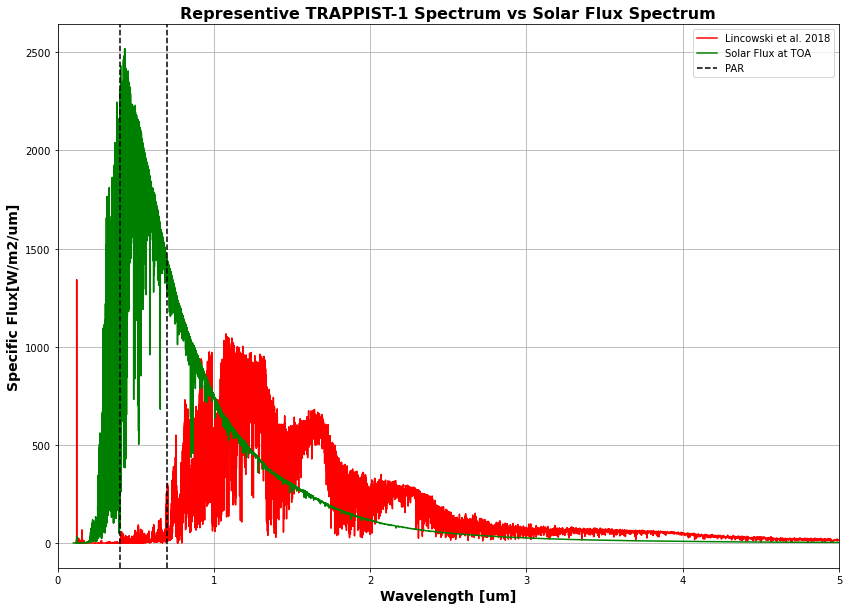

In [74]:
plt.plot(TRAP_data1['wavelength'],flux_TRAP1e, color='red', label='Lincowski et al. 2018')
#using Gillion et al. 2017 distance
plt.plot(sol_data['Wavelength'],sol_data['Solar Flux incident at top of atmosphere'], 
         color='green', label='Solar Flux at TOA')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux[W/m2/um]')
plt.xlim(0, 5)
plt.title('Representive TRAPPIST-1 Spectrum vs Solar Flux Spectrum')
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='black', ls='--')
plt.legend()
plt.grid();

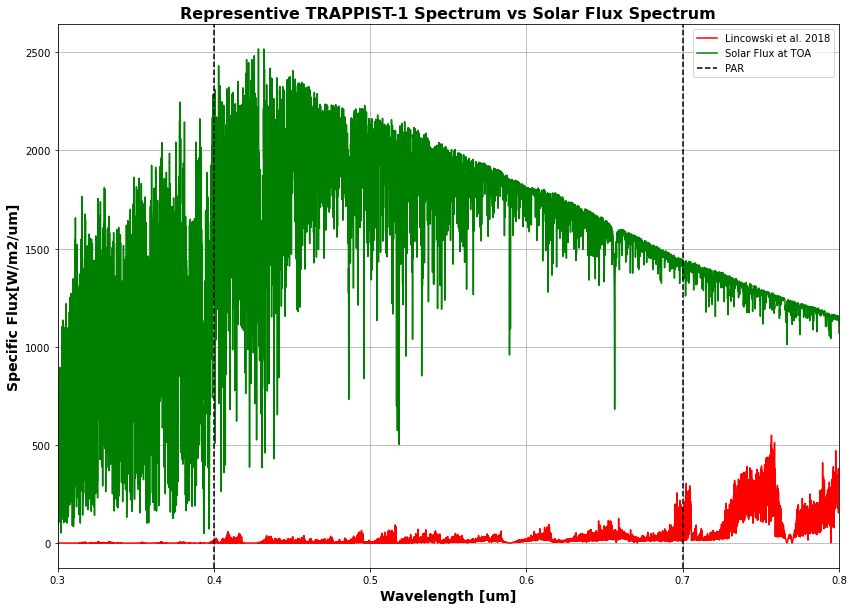

In [75]:
plt.plot(TRAP_data1['wavelength'],flux_TRAP1e, color='red', label='Lincowski et al. 2018')
#using Gillion et al. 2017 distance
plt.plot(sol_data['Wavelength'],sol_data['Solar Flux incident at top of atmosphere'], 
         color='green', label='Solar Flux at TOA')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux[W/m2/um]')
plt.xlim(0.3, 0.8)
plt.title('Representive TRAPPIST-1 Spectrum vs Solar Flux Spectrum')
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='black', ls='--')
plt.legend()
plt.grid();

DESCRIBE WHAT'S GOING ON HERE:
........

In [76]:
h #planck's constant

6.62607015e-34

In [77]:
c #speed of light, m/s 

299792458.0

In [78]:
k #Boltzmann's constant

1.380649e-23

In [79]:
TRAP_data1['wavelength']*1e-6

0        1.200110e-07
1        1.200120e-07
2        1.200130e-07
3        1.200150e-07
4        1.200160e-07
             ...     
83272    1.851850e-04
83273    1.886790e-04
83274    1.923080e-04
83275    1.960780e-04
83276    2.000000e-04
Name: wavelength, Length: 83277, dtype: float64

In [80]:
#wavelength is in microns, needs to be meters
energy_TRAP1e = (h*c)/(TRAP_data1['wavelength']*1e-6)
energy_sol = (h*c)/(sol_data['Wavelength']*1e-6)
energy_sol

0        1.982877e-18
1        1.982857e-18
2        1.982837e-18
3        1.982817e-18
4        1.982798e-18
             ...     
97816    3.980837e-20
97817    3.978852e-20
97818    3.976861e-20
97819    3.974879e-20
97820    3.972892e-20
Name: Wavelength, Length: 97821, dtype: float64

In [81]:
TRAP1e_flux_photons = flux_TRAP1e/energy_TRAP1e
sol_flux_photons = sol_data['Solar Flux incident at top of atmosphere']/energy_sol
sol_flux_photons

0        4.070969e+17
1        4.070909e+17
2        4.070849e+17
3        4.070789e+17
4        4.070728e+17
             ...     
97816    8.982859e+19
97817    8.980907e+19
97818    9.037682e+19
97819    9.030589e+19
97820    8.962943e+19
Length: 97821, dtype: float64

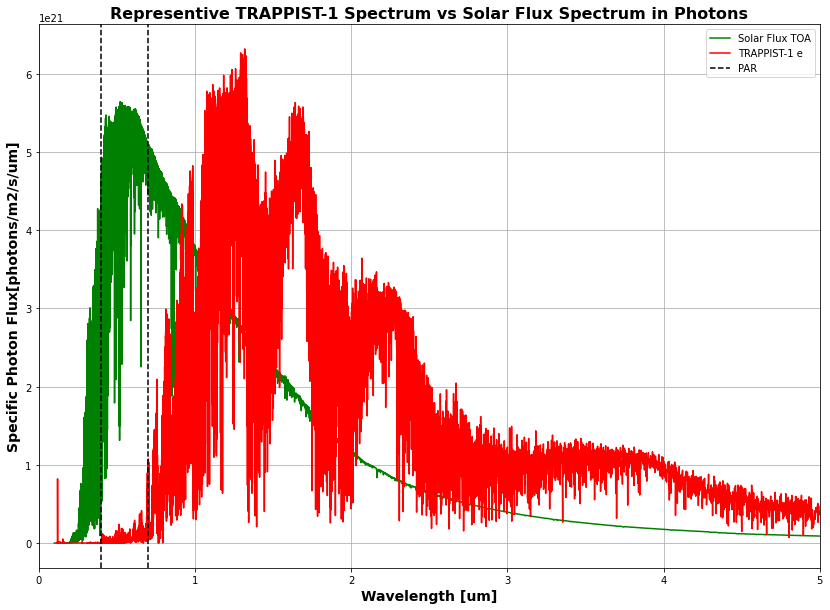

In [96]:
plt.plot(sol_data['Wavelength'], sol_flux_photons, color='green', label='Solar Flux TOA')
plt.plot(TRAP_data1['wavelength'], TRAP1e_flux_photons, color='red', label='TRAPPIST-1 e')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Photon Flux[photons/m2/s/um]')
plt.title('Representive TRAPPIST-1 Spectrum vs Solar Flux Spectrum in Photons')
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='black', ls='--')
plt.xlim(0, 5)
plt.legend()
plt.grid();

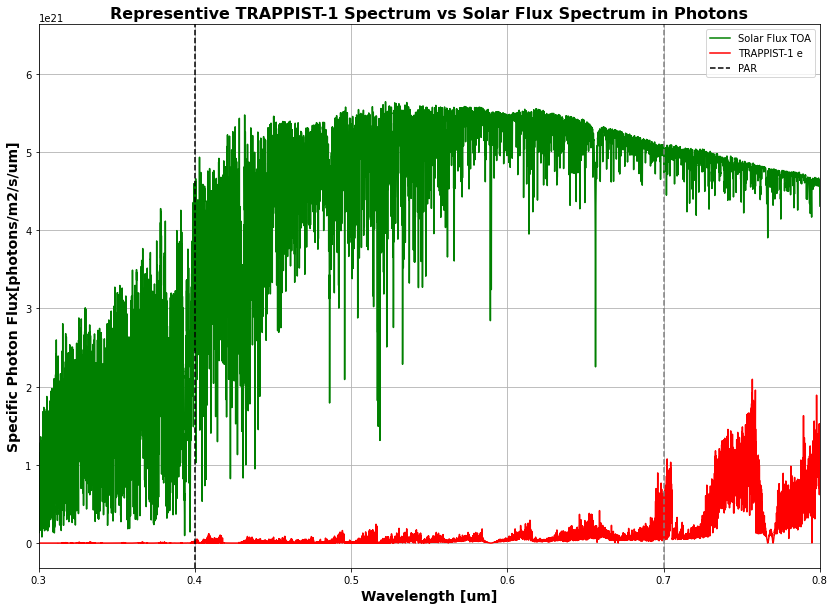

In [107]:
plt.plot(sol_data['Wavelength'], sol_flux_photons, color='green', label='Solar Flux TOA')
plt.plot(TRAP_data1['wavelength'], TRAP1e_flux_photons, color='red', label='TRAPPIST-1 e')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Photon Flux[photons/m2/s/um]')
plt.title('Representive TRAPPIST-1 Spectrum vs Solar Flux Spectrum in Photons')
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='gray', ls='--')
plt.xlim(0.3, 0.8)
plt.legend()
plt.grid();

From the coding above using the data sets from Trapezoid Rule:


| Instellation in Photons                                          | Full Wavelength        | PAR                        |
|------------------------------------------------------------------|------------------------|----------------------------|
| Sun-Earth                                                        | 6.318968046213717e+21  |  1.4558190736255224e+21    |
| TRAPPIST 1e (Gillion et al. 2017)                                | 9.242853803613324e+21  | 1.42697320063445e+19       |
|  TRAPPIST 1e (Agol et al. 2021)                                  | 8.57290550803499e+21   | 1.3235421301108281e+19     |


In [86]:
TRAP_data1['wavelength']

0          0.120011
1          0.120012
2          0.120013
3          0.120015
4          0.120016
            ...    
83272    185.185000
83273    188.679000
83274    192.308000
83275    196.078000
83276    200.000000
Name: wavelength, Length: 83277, dtype: float64

In [87]:
def blackbody_wav_photons(w, T): #w is lambda in meters, T is temperature in Kelvin, these are the inputs
    s = (h*c)/(w*k*T) # define section of equation, e^(...)
    x = (2*h*(c**2))/(w**5) #front portion of equation 
    y = x/(np.exp(s) - 1)#b is B_lambda
    b = y*np.pi #converting intensity to flux, acknowledging steradians
    e = (h*c)/w #photon energy of E = hc/lambda
    j = b/e #output of photons m-2 s-1 per wavelength(m)
    return np.array([w,j]) #output of array  of (wavelength, B_lambda) as W/m^2 per unit wavelength (meter)

In [88]:
Sol_flux_photons = blackbody_wav_photons(wave, 5772) #Sun's temperature 5772 K
TRAP1_flux_photons = blackbody_wav_photons(wave, 2566) #TRAPPIST-1's temp 2566 K
TRAP1_flux_photons

array([[1.00000000e-008, 1.00100000e-008, 1.00200000e-008, ...,
        2.99999970e-004, 2.99999980e-004, 2.99999990e-004],
       [5.78875153e-203, 1.00952655e-202, 1.75859870e-202, ...,
        1.23263722e+025, 1.23263710e+025, 1.23263698e+025]])

In [89]:
L_Sol_photons = 4*np.pi*((R_sol)**2)*(Sol_flux_photons[1])
Earth_insol_Gill_spectra_photons = (L_Sol_photons)/(4*np.pi*((au)**2))
L_TRAP1e_photons = 4*np.pi*((R_TRAP1)**2)*(TRAP1_flux_photons[1])
TRAP1_e_insol_Gill_spectra_photons = (L_TRAP1e_photons)/(4*np.pi*((0.02817*au)**2))
TRAP1_e_insol_Gill_spectra_photons #W/m^2 per wavelength (m)

array([2.24159376e-206, 3.90921670e-206, 6.80986885e-206, ...,
       4.77317412e+021, 4.77317365e+021, 4.77317317e+021])

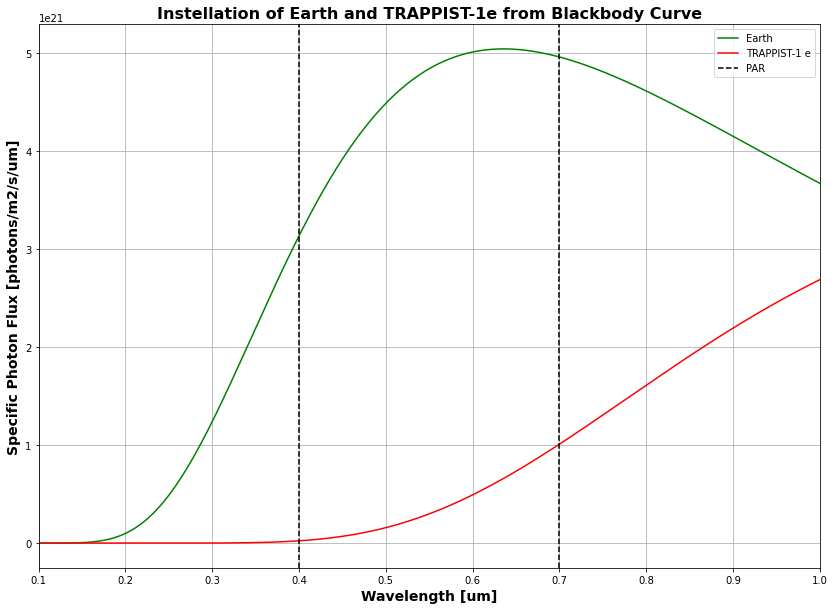

In [90]:
plt.plot(TRAP1_flux_photons[0]/1e-6, Earth_insol_Gill_spectra_photons*1e-6, color='green', label='Earth')
plt.plot(flux[0]/1e-6, TRAP1_e_insol_Gill_spectra_photons*1e-6, color='red', label='TRAPPIST-1 e')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Photon Flux [photons/m2/s/um]')
plt.title('Instellation of Earth and TRAPPIST-1e from Blackbody Curve')
plt.xlim(0.1, 1)
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='black', ls='--')
plt.legend()
plt.grid();

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


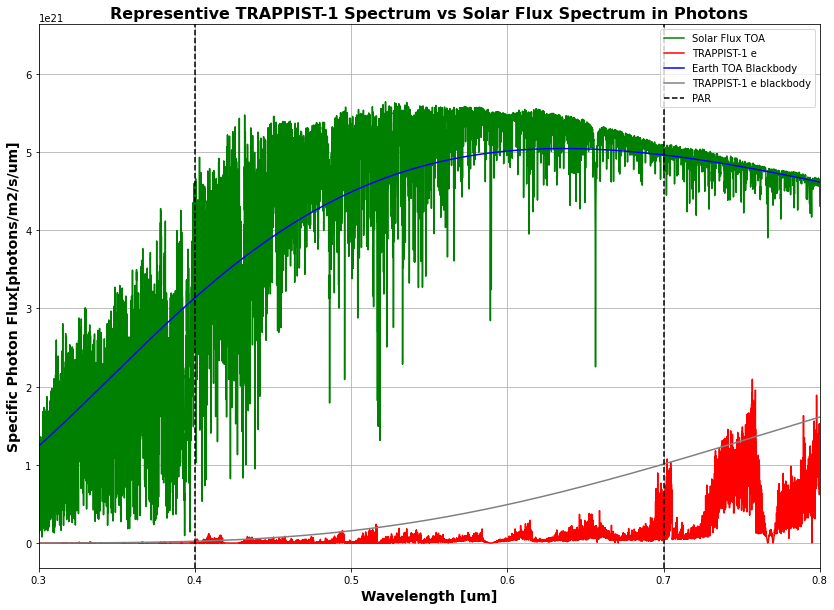

In [108]:
plt.plot(sol_data['Wavelength'], sol_flux_photons, color='green', label='Solar Flux TOA')
plt.plot(TRAP_data1['wavelength'], TRAP1e_flux_photons, color='red', label='TRAPPIST-1 e')
plt.plot(TRAP1_flux_photons[0]/1e-6, Earth_insol_Gill_spectra_photons*1e-6, 
         ls='-', color='blue', label='Earth TOA Blackbody')
plt.plot(flux[0]/1e-6, TRAP1_e_insol_Gill_spectra_photons*1e-6, ls='-', color='grey', label='TRAPPIST-1 e blackbody')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Photon Flux[photons/m2/s/um]')
plt.title('Representive TRAPPIST-1 Spectrum vs Solar Flux Spectrum in Photons')
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='black', ls='--')
plt.xlim(0.3, 0.8)
plt.legend()
plt.grid();

In [109]:
Earth_insol_Gill_spectra_photons.max()*1e-6

5.043577267576352e+21

In [110]:
sol_flux_photons.max()

5.642337700654326e+21

In the PAR range in photons, the area of the amount of photons from the blackbody curve is 7.29 times higher than the model spectra (based on the distance from Gillion et. al. 2017). Where as the blackbody curve appears to match up with the spectra model more of the Solar Flux TOA. In either case, it does still show that the sun recieves far more photons by a factor of 2 compared to TRAPPIST-1 e. (Vary the amount of the sun to the blackbody sun in PAR region)

In [111]:
#test in full wavelength for photons of Solar Flux
n = []
n = sol_data['Solar Flux incident at top of atmosphere']
m = []
m = sol_data['Wavelength']
o, p = sol_data['Wavelength'][0], sol_data['Wavelength'][97820]
trap_rule_data_defintgral_photons(m, n, o, p, h, c)

6.318968046213717e+21

In [112]:
sol_flux_full = trap_rule_data_defintgral_photons(m, n, o, p, h, c)

In [113]:
#PAR region for photons of Solar Flux
sol_flux_PAR = trap_rule_data_defintgral_photons(m, n, d, e, h, c)
sol_flux_PAR 

1.4558190736255224e+21

PAR solar insolation for Earth in photons from the blackbody function curver is 1.3714952462975705e+21, from 'TRAP1_insol_photons_total&PAR_figures.ipynb'. Meaning the PAR region from the solar flux data is greater than the blackbody curve.

In [114]:
sol_flux_PAR/1.3714952462975705e+21

1.0614831349620708

In [115]:
1.3714952462975705e+21/sol_flux_PAR

0.9420780858998126

Comparsion between the Solar Flux and Trappist-1 e. Reminder, 'b_photon_PAR' is from Agol et. al. 2021 distance while 'l_photon_PAR' is from Gillion et. al. 2017 distance

In [116]:
#fraction Trappist-1e data over Solar Flux TOA data 
b_photon_PAR/sol_flux_PAR

0.009091391602767807

In [117]:
l_photon_PAR/sol_flux_PAR

0.009801858118816675

In [118]:
#fraction Trappist-1e blackbody over Solar Flux TOA blackbody
(1.040342063775682e+20)/(1.3714952462975705e+21)

0.07585458765417852

In [119]:
#fraction Trappist-1e data over Solar Flux TOA blackbody
b_photon_PAR/(1.3714952462975705e+21)

0.009650358859673816

In [120]:
l_photon_PAR/(1.3714952462975705e+21)

0.010404507084414951

In [121]:
#fraction Trappist-1e blackbody over Solar Flux TOA data
(1.040342063775682e+20)/sol_flux_PAR

0.07146094474396805